In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

model_colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
]
benchmark_colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]
bar_colors = [
    "#4a4a4a",
    "#4c72b0",
    "#dd8452",
    "#55a868",
    "#c44e52",
    "#8172b3",
    "#937860",
    "#da8bc3",
]
bar_threshold_colors = [
    "#4c72b0",
    "#dd8452",
    "#55a868",
    "#c44e52",
    "#8172b3",
    "#937860",
    "#da8bc3",
    "#64b5cd",
]
markers = ["o", "s", "^", "D", "v", "p", "h", "*"]


def calc_subplot_layout(n_items, max_cols=4):
    """동적으로 subplot 레이아웃 계산 (rows, cols, figsize)"""
    if n_items == 0:
        return 1, 1, (6, 4)
    cols = min(n_items, max_cols)
    rows = math.ceil(n_items / cols)
    fig_width = 5 * cols
    fig_height = 4.5 * rows
    return rows, cols, (fig_width, fig_height)


def create_dynamic_subplots(n_items, max_cols=4, height_per_row=4.5, width_per_col=5):
    """동적으로 subplot 생성"""
    rows, cols, figsize = calc_subplot_layout(n_items, max_cols)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # 항상 1D 배열로 반환
    if n_items == 1:
        axes = np.array([axes])
    else:
        axes = np.array(axes).flatten()

    # 사용하지 않는 subplot 숨기기
    for i in range(n_items, len(axes)):
        axes[i].set_visible(False)

    return fig, axes


# Load data
with open("../outputs/leaderboard_rollout.json", "r") as f:
    rollout_data = json.load(f)

with open("../outputs/leaderboard_thinkbrake.json", "r") as f:
    thinkbrake_data = json.load(f)


INCLUDE_MODELS = [
    "Qwen_Qwen3-4B-Thinking-2507",
    "Qwen_Qwen3-4B",
    "Qwen_Qwen3-14B",
    "deepseek-ai_DeepSeek-R1-Distill-Llama-8B",
    "deepseek-ai_DeepSeek-R1-Distill-Qwen-7B",
    # 'openai_gpt-oss-20b',
]

INCLUDE_BENCHMARKS = [
    "gsm8k",
    "math500",
    "aime2024",
    "aime2025",
    "gpqa-diamond",
    "mmlu-redux",
]

INCLUDE_THRESHOLDS = [
    # '0.0',
    "0.25",
    "1.0",
    "2.5",
    "5.0",
]

model_name_map = {
    "Qwen_Qwen3-4B-Thinking-2507": "Qwen/Qwen3-4B-Thinking-2507",
    "Qwen_Qwen3-4B": "Qwen/Qwen3-4B",
    "Qwen_Qwen3-14B": "Qwen/Qwen3-14B",
    "deepseek-ai_DeepSeek-R1-Distill-Llama-8B": "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "deepseek-ai_DeepSeek-R1-Distill-Qwen-7B": "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "openai_gpt-oss-20b": "openai/gpt-oss-20b",
}

short_names = {
    "Qwen/Qwen3-4B-Thinking-2507": "Qwen3-4B-2507",
    "Qwen/Qwen3-4B": "Qwen3-4B",
    "Qwen/Qwen3-14B": "Qwen3-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "DS-R1-8B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "DS-R1-7B",
    "openai/gpt-oss-20b": "GPT-OSS-20B",
}

benchmarks = INCLUDE_BENCHMARKS
# Sort thresholds numerically (ascending order)
thresholds = sorted(INCLUDE_THRESHOLDS, key=lambda x: float(x))

# 실제로 데이터가 있는 모델만 필터링
filtered_rollout_data = {k: v for k, v in rollout_data.items() if k in INCLUDE_MODELS}
filtered_thinkbrake_data = {
    k: v
    for k, v in thinkbrake_data.items()
    if k in [model_name_map.get(m, m) for m in INCLUDE_MODELS]
}
baseline_data = filtered_rollout_data

print("✅ Data loaded and filtered successfully!")
print(f"Included models (rollout): {list(filtered_rollout_data.keys())}")
print(f"Included models (thinkbrake): {list(filtered_thinkbrake_data.keys())}")
print(f"Included benchmarks: {benchmarks}")
print(f"Included thresholds: {thresholds}")

✅ Data loaded and filtered successfully!
Included models (rollout): ['Qwen_Qwen3-4B-Thinking-2507', 'Qwen_Qwen3-14B', 'deepseek-ai_DeepSeek-R1-Distill-Llama-8B', 'Qwen_Qwen3-4B']
Included models (thinkbrake): ['Qwen/Qwen3-4B-Thinking-2507', 'Qwen/Qwen3-14B', 'deepseek-ai/DeepSeek-R1-Distill-Llama-8B', 'Qwen/Qwen3-4B', 'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B']
Included benchmarks: ['gsm8k', 'math500', 'aime2024', 'aime2025', 'gpqa-diamond', 'mmlu-redux']
Included thresholds: ['0.25', '1.0', '2.5', '5.0']


## 1. Accuracy by Threshold (per model, per benchmark)
Visualize how accuracy changes as threshold increases for each model


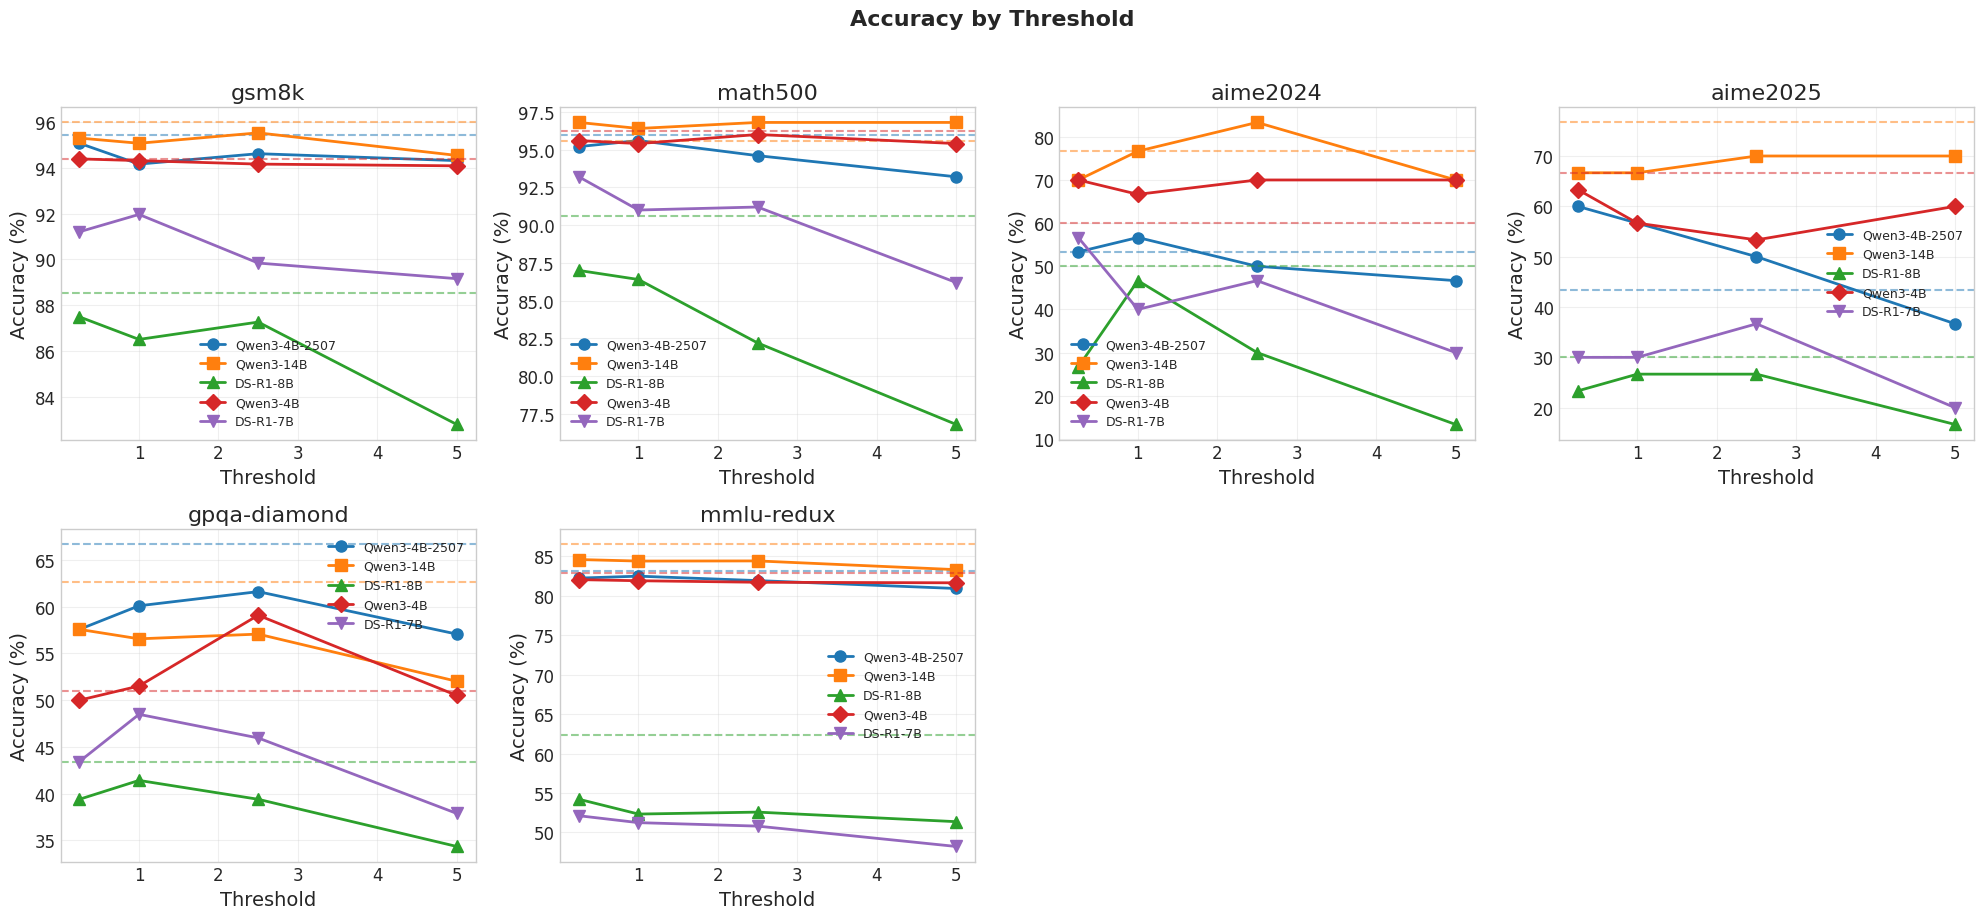

In [2]:
# 동적 레이아웃으로 subplot 생성
n_benchmarks = len(benchmarks)
fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=4)

for idx, benchmark in enumerate(benchmarks):
    ax = axes[idx]

    for model_idx, (model_name, model_data) in enumerate(
        filtered_thinkbrake_data.items()
    ):
        try:
            if benchmark not in model_data:
                continue

            bench_data = model_data[benchmark]
            x_vals = []
            y_vals = []

            for thresh in thresholds:
                key = f"threshold_{thresh}"
                if key in bench_data:
                    x_vals.append(float(thresh))
                    y_vals.append(bench_data[key]["accuracy"])

            if x_vals:
                # ThinkBrake line (solid)
                ax.plot(
                    x_vals,
                    y_vals,
                    marker=markers[model_idx % len(markers)],
                    color=model_colors[model_idx % len(model_colors)],
                    linewidth=2,
                    markersize=8,
                    label=short_names.get(model_name, model_name),
                )

                # Add baseline horizontal line (dashed)
                # Find corresponding rollout name
                for rollout_name in filtered_rollout_data:
                    if model_name_map.get(rollout_name) == model_name:
                        if benchmark in filtered_rollout_data[rollout_name]:
                            baseline_acc = filtered_rollout_data[rollout_name][
                                benchmark
                            ]["accuracy"]
                            ax.axhline(
                                y=baseline_acc,
                                color=model_colors[model_idx % len(model_colors)],
                                linestyle="--",
                                alpha=0.5,
                                linewidth=1.5,
                            )
                        break
        except Exception:
            continue

    ax.set_xlabel("Threshold")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(f"{benchmark}")
    ax.legend(loc="best", fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle("Accuracy by Threshold", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## 2. Token Savings by Threshold
Observe how token savings (%) increases as threshold increases (higher = more efficient)


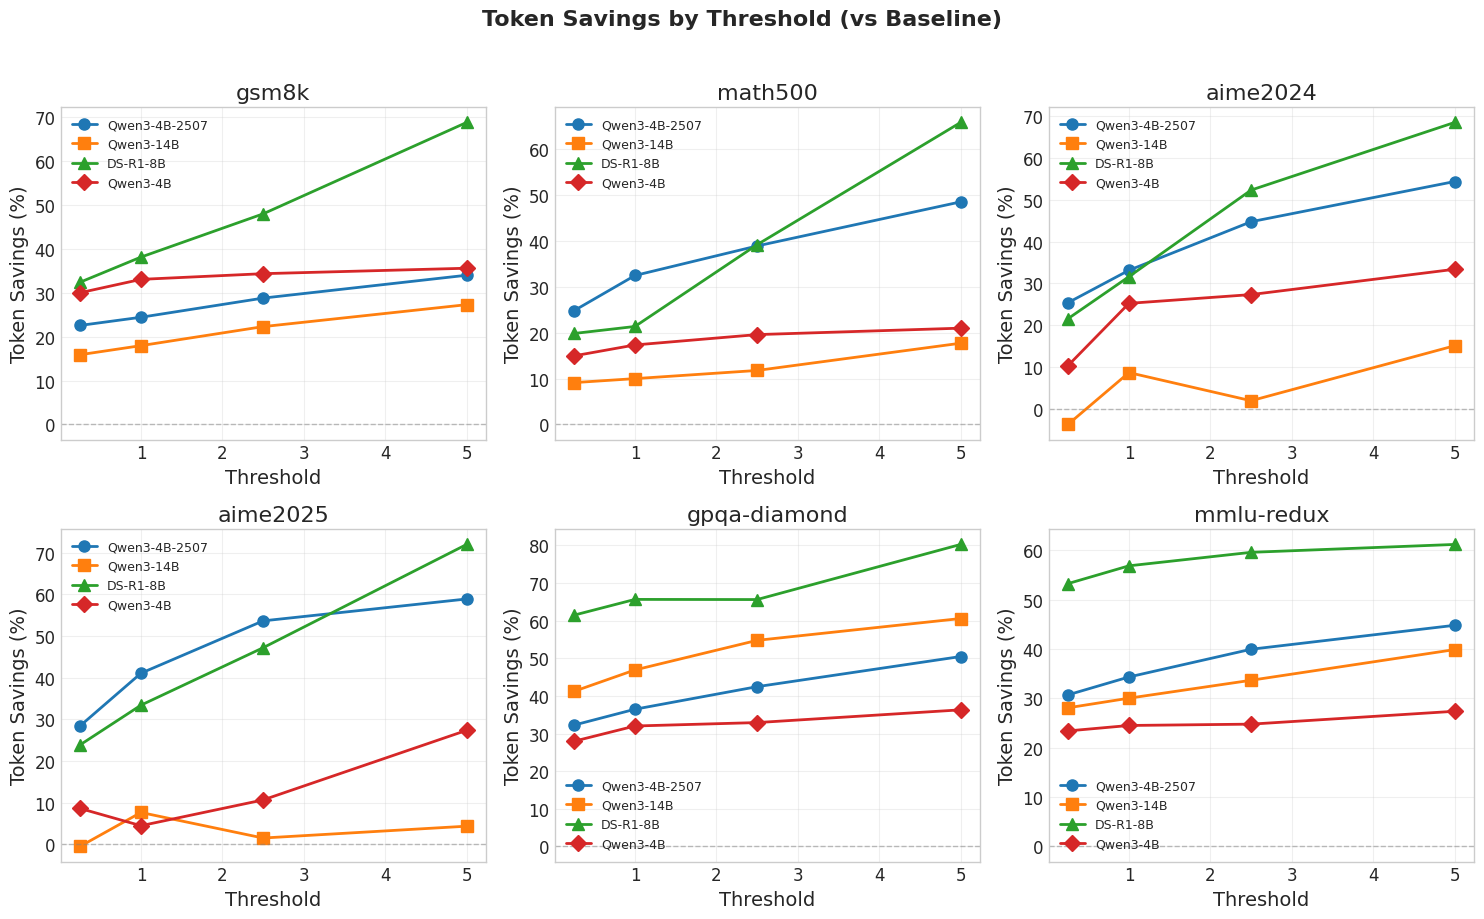

In [3]:
# 동적 레이아웃으로 subplot 생성
n_benchmarks = len(benchmarks)
fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=3)

for idx, benchmark in enumerate(benchmarks):
    ax = axes[idx]

    for model_idx, (model_name, model_data) in enumerate(
        filtered_thinkbrake_data.items()
    ):
        try:
            if benchmark not in model_data:
                continue

            # Find baseline token length for this model/benchmark
            baseline_tokens = None
            for rollout_name in filtered_rollout_data:
                if model_name_map.get(rollout_name) == model_name:
                    if benchmark in filtered_rollout_data[rollout_name]:
                        baseline_tokens = filtered_rollout_data[rollout_name][
                            benchmark
                        ]["avg_token_length"]
                    break

            if baseline_tokens is None:
                continue

            bench_data = model_data[benchmark]
            x_vals = []
            y_vals = []

            for thresh in thresholds:
                key = f"threshold_{thresh}"
                if key in bench_data:
                    x_vals.append(float(thresh))
                    # Calculate token savings % (higher = more efficient)
                    token_savings = (
                        1 - bench_data[key]["avg_token_length"] / baseline_tokens
                    ) * 100
                    y_vals.append(token_savings)

            if x_vals:
                # ThinkBrake line (solid)
                ax.plot(
                    x_vals,
                    y_vals,
                    marker=markers[model_idx % len(markers)],
                    color=model_colors[model_idx % len(model_colors)],
                    linewidth=2,
                    markersize=8,
                    label=short_names.get(model_name, model_name),
                )
        except Exception:
            continue

    ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5, linewidth=1)
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Token Savings (%)")
    ax.set_title(f"{benchmark}")
    ax.legend(loc="best", fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle(
    "Token Savings by Threshold (vs Baseline)", fontsize=16, fontweight="bold", y=1.02
)
plt.tight_layout()
plt.show()

## 7. Average Performance by Model (Bar Chart)
Compare average accuracy across all benchmarks for each model


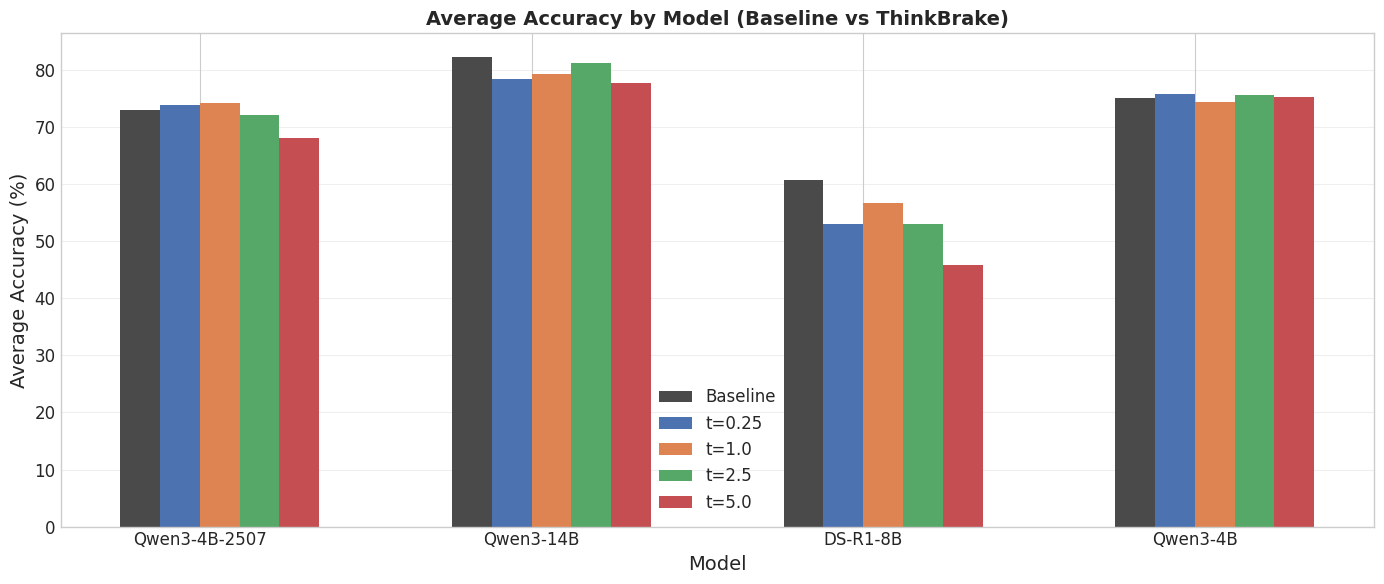

In [4]:
# Calculate average accuracy by model and threshold
avg_data = []

for rollout_name, rollout_model_data in filtered_rollout_data.items():
    try:
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        # Baseline average
        baseline_accs = []
        for b in benchmarks:
            try:
                if b in rollout_model_data:
                    baseline_accs.append(rollout_model_data[b]["accuracy"])
            except Exception:
                pass

        if baseline_accs:
            avg_data.append(
                {
                    "model": display_name,
                    "type": "Baseline",
                    "avg_accuracy": np.mean(baseline_accs),
                }
            )

        # ThinkBrake average for each threshold
        if mapped_name in filtered_thinkbrake_data:
            for thresh in thresholds:
                tb_accs = []
                for benchmark in benchmarks:
                    try:
                        if benchmark in filtered_thinkbrake_data[mapped_name]:
                            key = f"threshold_{thresh}"
                            if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                                tb_accs.append(
                                    filtered_thinkbrake_data[mapped_name][benchmark][
                                        key
                                    ]["accuracy"]
                                )
                    except Exception:
                        pass
                if tb_accs:
                    avg_data.append(
                        {
                            "model": display_name,
                            "type": f"t={thresh}",
                            "avg_accuracy": np.mean(tb_accs),
                        }
                    )
    except Exception:
        continue

if avg_data:
    df_avg = pd.DataFrame(avg_data)

    # Grouped bar chart
    fig, ax = plt.subplots(figsize=(14, 6))

    models = df_avg["model"].unique()
    types = df_avg["type"].unique()
    x = np.arange(len(models))
    width = 0.12

    for i, t in enumerate(types):
        try:
            type_data = df_avg[df_avg["type"] == t]
            values = [
                (
                    type_data[type_data["model"] == m]["avg_accuracy"].values[0]
                    if len(type_data[type_data["model"] == m]) > 0
                    else 0
                )
                for m in models
            ]
            ax.bar(
                x + i * width,
                values,
                width,
                label=t,
                color=bar_colors[i % len(bar_colors)],
            )
        except Exception:
            continue

    ax.set_xlabel("Model")
    ax.set_ylabel("Average Accuracy (%)")
    ax.set_title(
        "Average Accuracy by Model (Baseline vs ThinkBrake)",
        fontsize=14,
        fontweight="bold",
    )
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(models)
    ax.legend()
    ax.grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()
else:
    print("No data available for this plot.")

## Per-Model Analysis: Token Savings across Benchmarks
Each subplot shows one model's token savings (%) at different thresholds for all benchmarks (higher = more efficient)


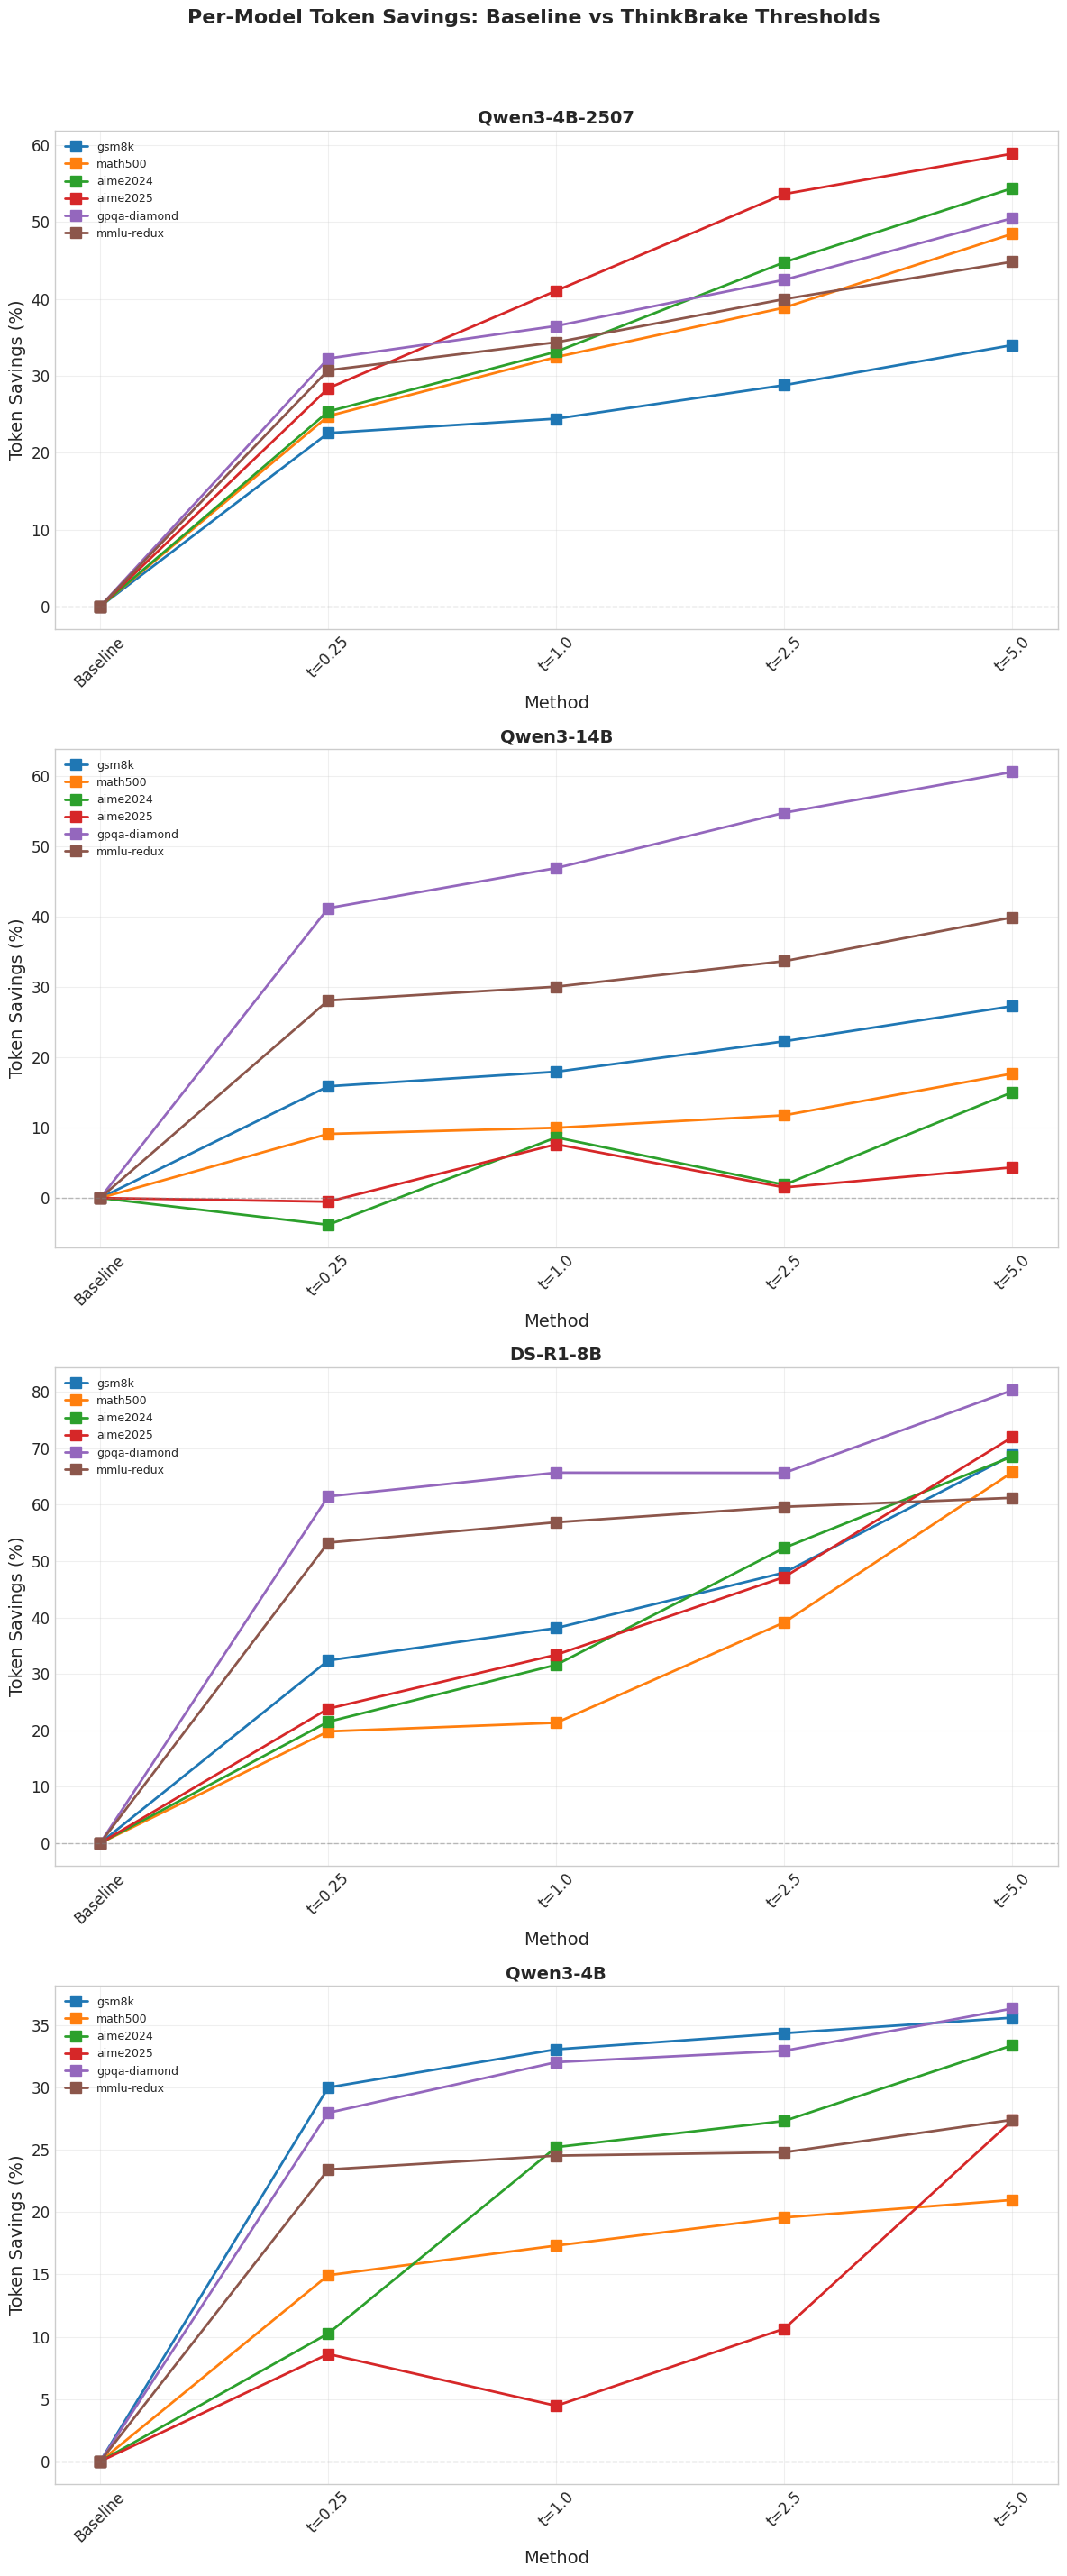

In [7]:
# Per-model token savings comparison across benchmarks
num_models = len(filtered_rollout_data)
if num_models == 0:
    print("No data available for this plot.")
else:
    fig, axes = plt.subplots(num_models, 1, figsize=(12, 7 * num_models))
    if num_models == 1:
        axes = [axes]

    for model_idx, (rollout_name, rollout_model_data) in enumerate(
        filtered_rollout_data.items()
    ):
        ax = axes[model_idx]
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        for bench_idx, benchmark in enumerate(benchmarks):
            try:
                if benchmark not in rollout_model_data:
                    continue

                # Baseline
                baseline_tokens = rollout_model_data[benchmark]["avg_token_length"]

                # ThinkBrake data
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    x_vals = ["Baseline"]
                    y_vals = [0]  # Baseline = 0% savings

                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            x_vals.append(f"t={thresh}")
                            # Calculate token savings % (higher = more efficient)
                            token_savings = (
                                1 - tb_data[key]["avg_token_length"] / baseline_tokens
                            ) * 100
                            y_vals.append(token_savings)

                    ax.plot(
                        x_vals,
                        y_vals,
                        marker="s",
                        linewidth=2,
                        markersize=8,
                        color=benchmark_colors[bench_idx % len(benchmark_colors)],
                        label=benchmark,
                    )
            except Exception:
                continue

        ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5, linewidth=1)
        ax.set_xlabel("Method")
        ax.set_ylabel("Token Savings (%)")
        ax.set_title(f"{display_name}", fontsize=14, fontweight="bold")
        ax.legend(loc="best", fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis="x", rotation=45)

    plt.suptitle(
        "Per-Model Token Savings: Baseline vs ThinkBrake Thresholds",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()

## Per-Model Bar Chart: Accuracy by Benchmark
Bar chart showing accuracy for each benchmark grouped by threshold (per model)


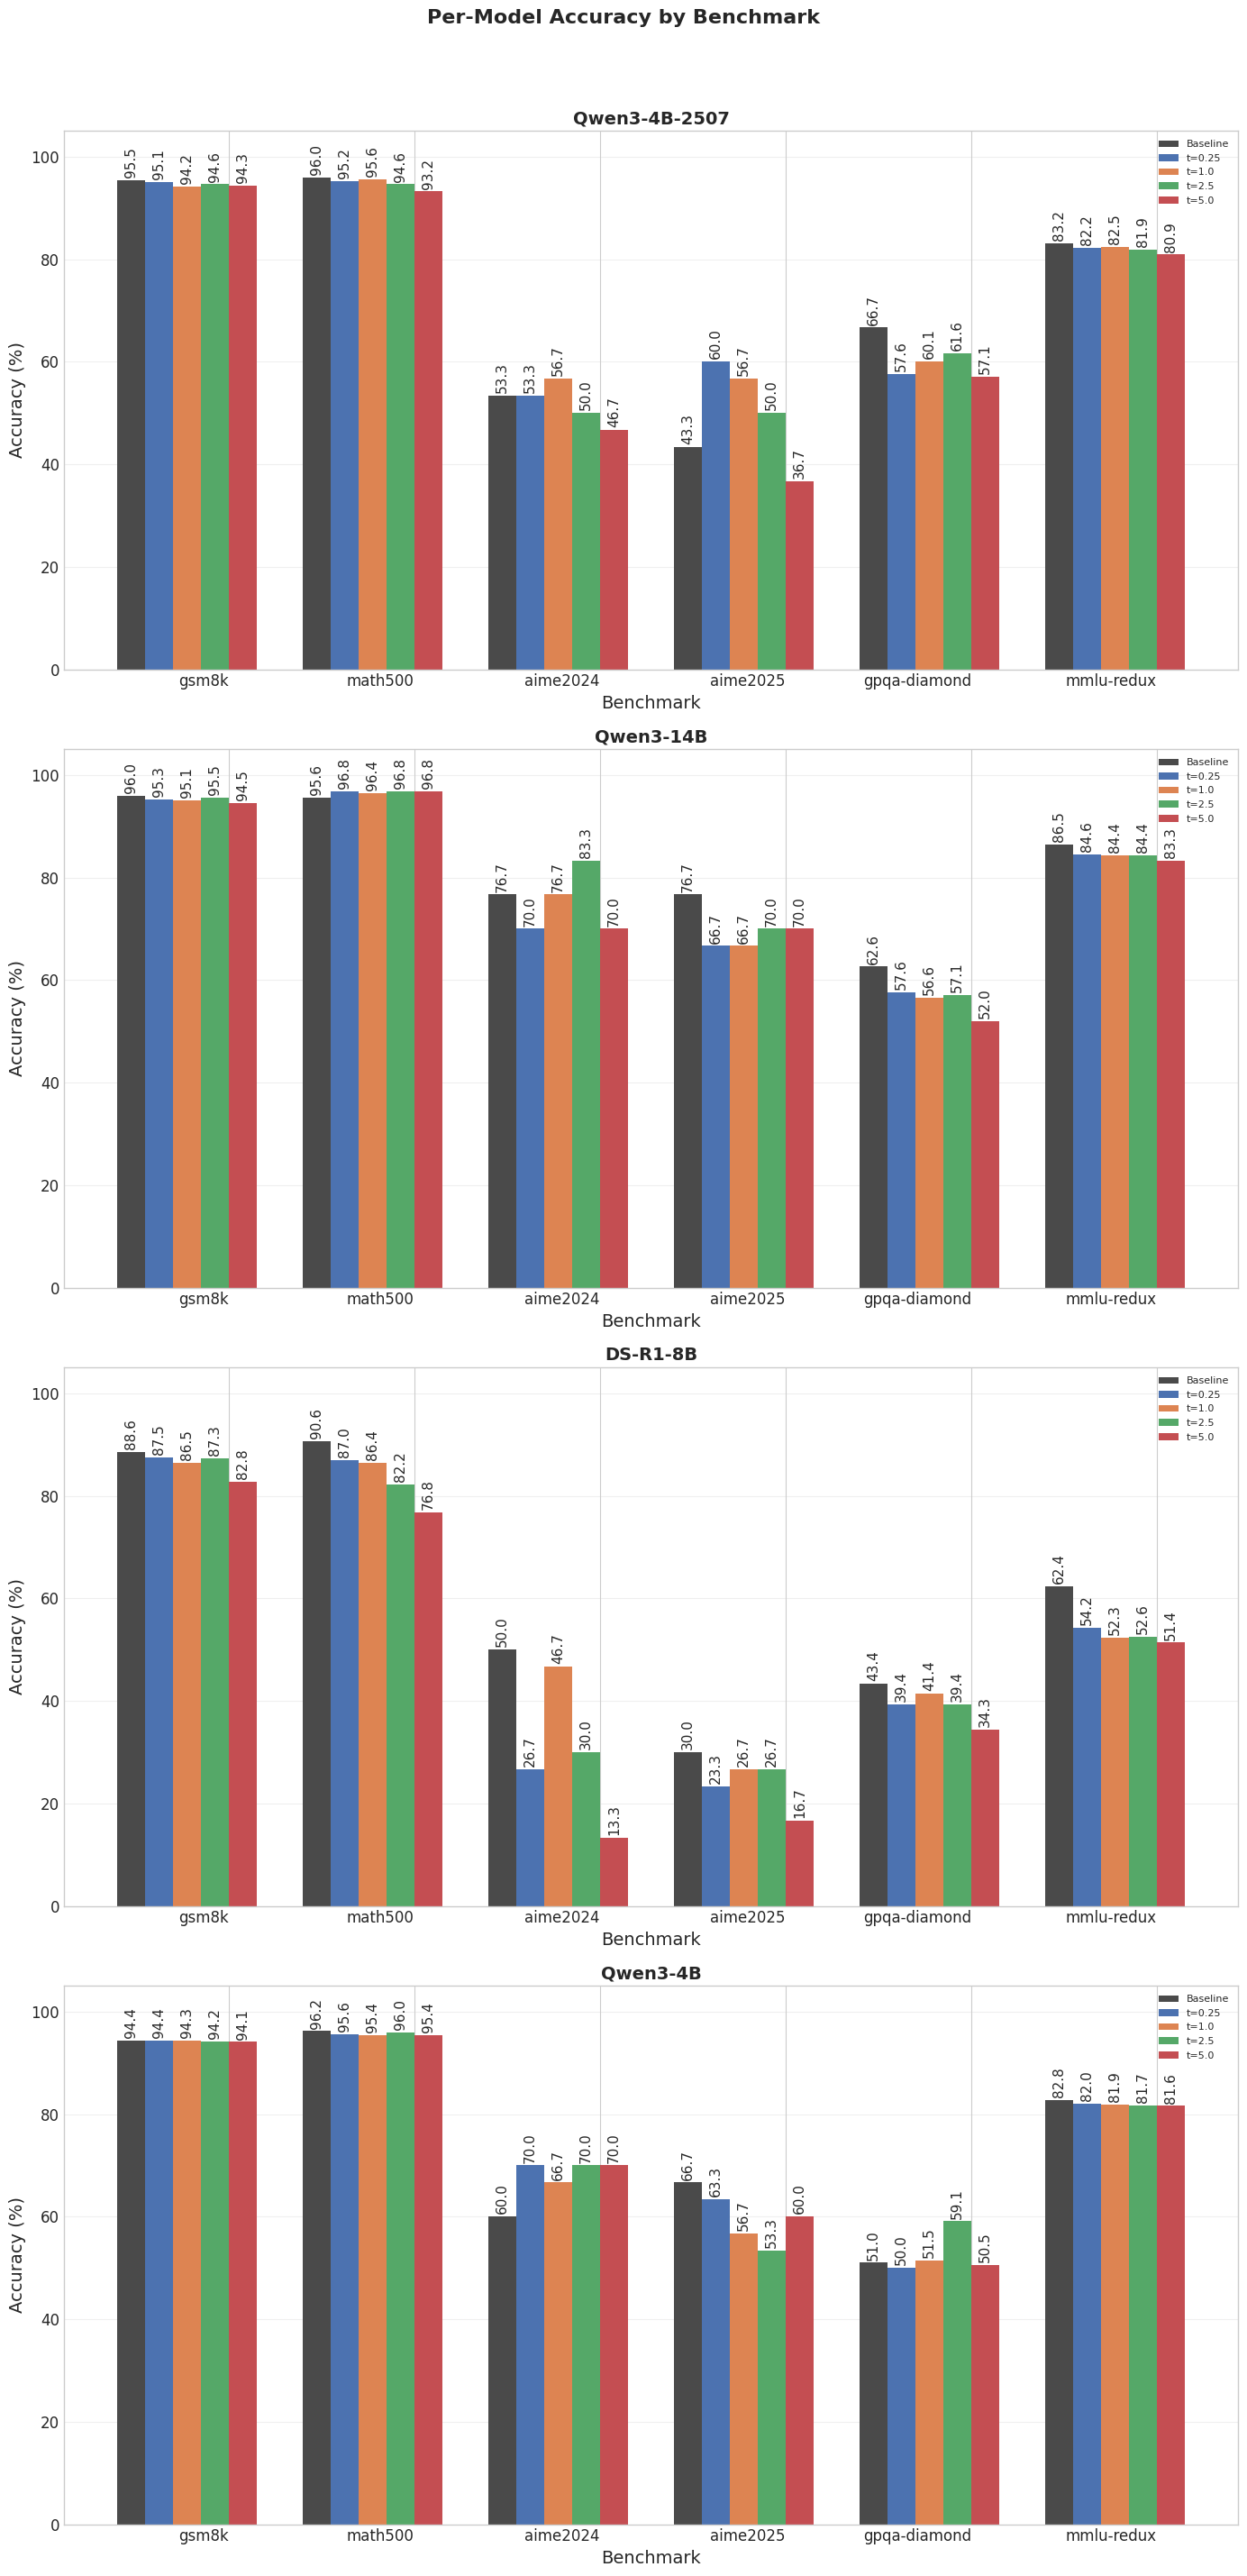

In [8]:
# Per-model bar chart: Accuracy by benchmark
num_models = len(filtered_rollout_data)
if num_models == 0:
    print("No data available for this plot.")
else:
    fig, axes = plt.subplots(num_models, 1, figsize=(14, 7 * num_models))
    if num_models == 1:
        axes = [axes]

    methods = ["Baseline"] + [f"t={t}" for t in thresholds]

    for model_idx, (rollout_name, rollout_model_data) in enumerate(
        filtered_rollout_data.items()
    ):
        ax = axes[model_idx]
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        # Collect data for this model
        model_benchmarks = []
        model_accuracies = {m: [] for m in methods}

        for benchmark in benchmarks:
            try:
                if benchmark not in rollout_model_data:
                    continue

                model_benchmarks.append(benchmark)

                # Baseline
                model_accuracies["Baseline"].append(
                    rollout_model_data[benchmark]["accuracy"]
                )

                # ThinkBrake thresholds
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            model_accuracies[f"t={thresh}"].append(
                                tb_data[key]["accuracy"]
                            )
                        else:
                            model_accuracies[f"t={thresh}"].append(0)
                else:
                    for t in thresholds:
                        model_accuracies[f"t={t}"].append(0)
            except Exception:
                continue

        # Plot grouped bars
        if model_benchmarks:
            x = np.arange(len(model_benchmarks))
            width = 0.15

            for i, method in enumerate(methods):
                try:
                    if model_accuracies[method]:
                        bars = ax.bar(
                            x + i * width,
                            model_accuracies[method],
                            width,
                            label=method,
                            color=bar_colors[i % len(bar_colors)],
                        )
                        # Add value labels on bars
                        for bar, val in zip(bars, model_accuracies[method]):
                            if val > 0:
                                ax.text(
                                    bar.get_x() + bar.get_width() / 2,
                                    bar.get_height() + 0.5,
                                    f"{val:.1f}",
                                    ha="center",
                                    va="bottom",
                                    fontsize=11,
                                    rotation=90,
                                )
                except Exception:
                    continue

            ax.set_xlabel("Benchmark")
            ax.set_ylabel("Accuracy (%)")
            ax.set_title(f"{display_name}", fontsize=14, fontweight="bold")
            ax.set_xticks(x + width * 3.5)
            ax.set_xticklabels(model_benchmarks, ha="right")
            ax.legend(loc="upper right", fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")
            ax.set_ylim(0, 105)

    plt.suptitle(
        "Per-Model Accuracy by Benchmark", fontsize=16, fontweight="bold", y=1.02
    )
    plt.tight_layout()
    plt.show()

## Per-Model Detailed Metrics Table
Show accuracy and token length for each model, benchmark, and threshold


In [9]:
# Per-model detailed metrics
for rollout_name, rollout_model_data in filtered_rollout_data.items():
    try:
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        print(f"\n{'='*80}")
        print(f"📊 {display_name}")
        print(f"{'='*80}")

        # Build table data
        table_data = []

        for benchmark in benchmarks:
            try:
                if benchmark not in rollout_model_data:
                    continue

                row = {"Benchmark": benchmark}

                # Baseline
                row["Baseline Acc"] = f"{rollout_model_data[benchmark]['accuracy']:.1f}"
                row["Baseline Tok"] = (
                    f"{rollout_model_data[benchmark]['avg_token_length']:.0f}"
                )

                # ThinkBrake thresholds
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            try:
                                acc = tb_data[key]["accuracy"]
                                tok = tb_data[key]["avg_token_length"]
                                acc_diff = (
                                    acc - rollout_model_data[benchmark]["accuracy"]
                                )
                                tok_diff = (
                                    1
                                    - tok
                                    / rollout_model_data[benchmark]["avg_token_length"]
                                ) * 100
                                row[f"t={thresh} Acc"] = f"{acc:.1f} ({acc_diff:+.1f})"
                                row[f"t={thresh} Tok"] = f"{tok:.0f} ({tok_diff:+.1f}%)"
                            except Exception:
                                row[f"t={thresh} Acc"] = "-"
                                row[f"t={thresh} Tok"] = "-"
                        else:
                            row[f"t={thresh} Acc"] = "-"
                            row[f"t={thresh} Tok"] = "-"

                table_data.append(row)
            except Exception:
                continue

        if table_data:
            df_table = pd.DataFrame(table_data)
            display(df_table)
    except Exception:
        continue


📊 Qwen3-4B-2507


,Benchmark,Baseline Acc,Baseline Tok,t=0.25 Acc,t=0.25 Tok,t=1.0 Acc,t=1.0 Tok,t=2.5 Acc,t=2.5 Tok,t=5.0 Acc,t=5.0 Tok
0,gsm8k,95.5,1565,95.1 (-0.4),1212 (+22.5%),94.2 (-1.3),1183 (+24.4%),94.6 (-0.8),1115 (+28.8%),94.3 (-1.1),1033 (+34.0%)
1,math500,96.0,6405,95.2 (-0.8),4820 (+24.8%),95.6 (-0.4),4328 (+32.4%),94.6 (-1.4),3916 (+38.9%),93.2 (-2.8),3302 (+48.5%)
2,aime2024,53.3,16070,53.3 (+0.0),11997 (+25.3%),56.7 (+3.3),10746 (+33.1%),50.0 (-3.3),8877 (+44.8%),46.7 (-6.7),7330 (+54.4%)
3,aime2025,43.3,17369,60.0 (+16.7),12441 (+28.4%),56.7 (+13.3),10238 (+41.1%),50.0 (+6.7),8056 (+53.6%),36.7 (-6.7),7143 (+58.9%)
4,gpqa-diamond,66.7,8455,57.6 (-9.1),5728 (+32.2%),60.1 (-6.6),5371 (+36.5%),61.6 (-5.1),4864 (+42.5%),57.1 (-9.6),4187 (+50.5%)
5,mmlu-redux,83.2,2173,82.2 (-0.9),1506 (+30.7%),82.5 (-0.7),1427 (+34.3%),81.9 (-1.3),1305 (+40.0%),80.9 (-2.3),1199 (+44.8%)



📊 Qwen3-14B


,Benchmark,Baseline Acc,Baseline Tok,t=0.25 Acc,t=0.25 Tok,t=1.0 Acc,t=1.0 Tok,t=2.5 Acc,t=2.5 Tok,t=5.0 Acc,t=5.0 Tok
0,gsm8k,96.0,1912,95.3 (-0.7),1608 (+15.9%),95.1 (-0.9),1569 (+18.0%),95.5 (-0.5),1486 (+22.3%),94.5 (-1.4),1390 (+27.3%)
1,math500,95.6,4991,96.8 (+1.2),4536 (+9.1%),96.4 (+0.8),4493 (+10.0%),96.8 (+1.2),4404 (+11.8%),96.8 (+1.2),4108 (+17.7%)
2,aime2024,76.7,12557,70.0 (-6.7),13035 (-3.8%),76.7 (+0.0),11474 (+8.6%),83.3 (+6.7),12321 (+1.9%),70.0 (-6.7),10667 (+15.0%)
3,aime2025,76.7,13800,66.7 (-10.0),13873 (-0.5%),66.7 (-10.0),12747 (+7.6%),70.0 (-6.7),13593 (+1.5%),70.0 (-6.7),13201 (+4.3%)
4,gpqa-diamond,62.6,7379,57.6 (-5.1),4338 (+41.2%),56.6 (-6.1),3917 (+46.9%),57.1 (-5.6),3337 (+54.8%),52.0 (-10.6),2909 (+60.6%)
5,mmlu-redux,86.5,1180,84.6 (-1.9),848 (+28.1%),84.4 (-2.1),825 (+30.1%),84.4 (-2.1),782 (+33.7%),83.3 (-3.2),709 (+39.9%)



📊 DS-R1-8B


,Benchmark,Baseline Acc,Baseline Tok,t=0.25 Acc,t=0.25 Tok,t=1.0 Acc,t=1.0 Tok,t=2.5 Acc,t=2.5 Tok,t=5.0 Acc,t=5.0 Tok
0,gsm8k,88.6,1906,87.5 (-1.1),1289 (+32.4%),86.5 (-2.0),1179 (+38.1%),87.3 (-1.3),992 (+48.0%),82.8 (-5.8),595 (+68.8%)
1,math500,90.6,4527,87.0 (-3.6),3631 (+19.8%),86.4 (-4.2),3561 (+21.3%),82.2 (-8.4),2756 (+39.1%),76.8 (-13.8),1551 (+65.7%)
2,aime2024,50.0,13363,26.7 (-23.3),10489 (+21.5%),46.7 (-3.3),9140 (+31.6%),30.0 (-20.0),6369 (+52.3%),13.3 (-36.7),4204 (+68.5%)
3,aime2025,30.0,14011,23.3 (-6.7),10672 (+23.8%),26.7 (-3.3),9333 (+33.4%),26.7 (-3.3),7402 (+47.2%),16.7 (-13.3),3928 (+72.0%)
4,gpqa-diamond,43.4,7912,39.4 (-4.0),3049 (+61.5%),41.4 (-2.0),2717 (+65.7%),39.4 (-4.0),2720 (+65.6%),34.3 (-9.1),1561 (+80.3%)
5,mmlu-redux,62.4,1289,54.2 (-8.2),602 (+53.3%),52.3 (-10.0),556 (+56.9%),52.6 (-9.8),521 (+59.6%),51.4 (-11.0),500 (+61.2%)



📊 Qwen3-4B


,Benchmark,Baseline Acc,Baseline Tok,t=0.25 Acc,t=0.25 Tok,t=1.0 Acc,t=1.0 Tok,t=2.5 Acc,t=2.5 Tok,t=5.0 Acc,t=5.0 Tok
0,gsm8k,94.4,2407,94.4 (+0.0),1685 (+30.0%),94.3 (-0.1),1612 (+33.0%),94.2 (-0.2),1580 (+34.3%),94.1 (-0.3),1550 (+35.6%)
1,math500,96.2,5210,95.6 (-0.6),4432 (+14.9%),95.4 (-0.8),4308 (+17.3%),96.0 (-0.2),4190 (+19.6%),95.4 (-0.8),4117 (+21.0%)
2,aime2024,60.0,14009,70.0 (+10.0),12572 (+10.3%),66.7 (+6.7),10478 (+25.2%),70.0 (+10.0),10184 (+27.3%),70.0 (+10.0),9334 (+33.4%)
3,aime2025,66.7,14508,63.3 (-3.3),13258 (+8.6%),56.7 (-10.0),13861 (+4.5%),53.3 (-13.3),12963 (+10.6%),60.0 (-6.7),10540 (+27.4%)
4,gpqa-diamond,51.0,7497,50.0 (-1.0),5401 (+28.0%),51.5 (+0.5),5097 (+32.0%),59.1 (+8.1),5028 (+32.9%),50.5 (-0.5),4774 (+36.3%)
5,mmlu-redux,82.8,1374,82.0 (-0.8),1052 (+23.4%),81.9 (-0.9),1037 (+24.5%),81.7 (-1.1),1033 (+24.8%),81.6 (-1.2),997 (+27.4%)


## Per-Model Token Savings Bar Chart
Show token savings (%) for each benchmark at different thresholds (per model)


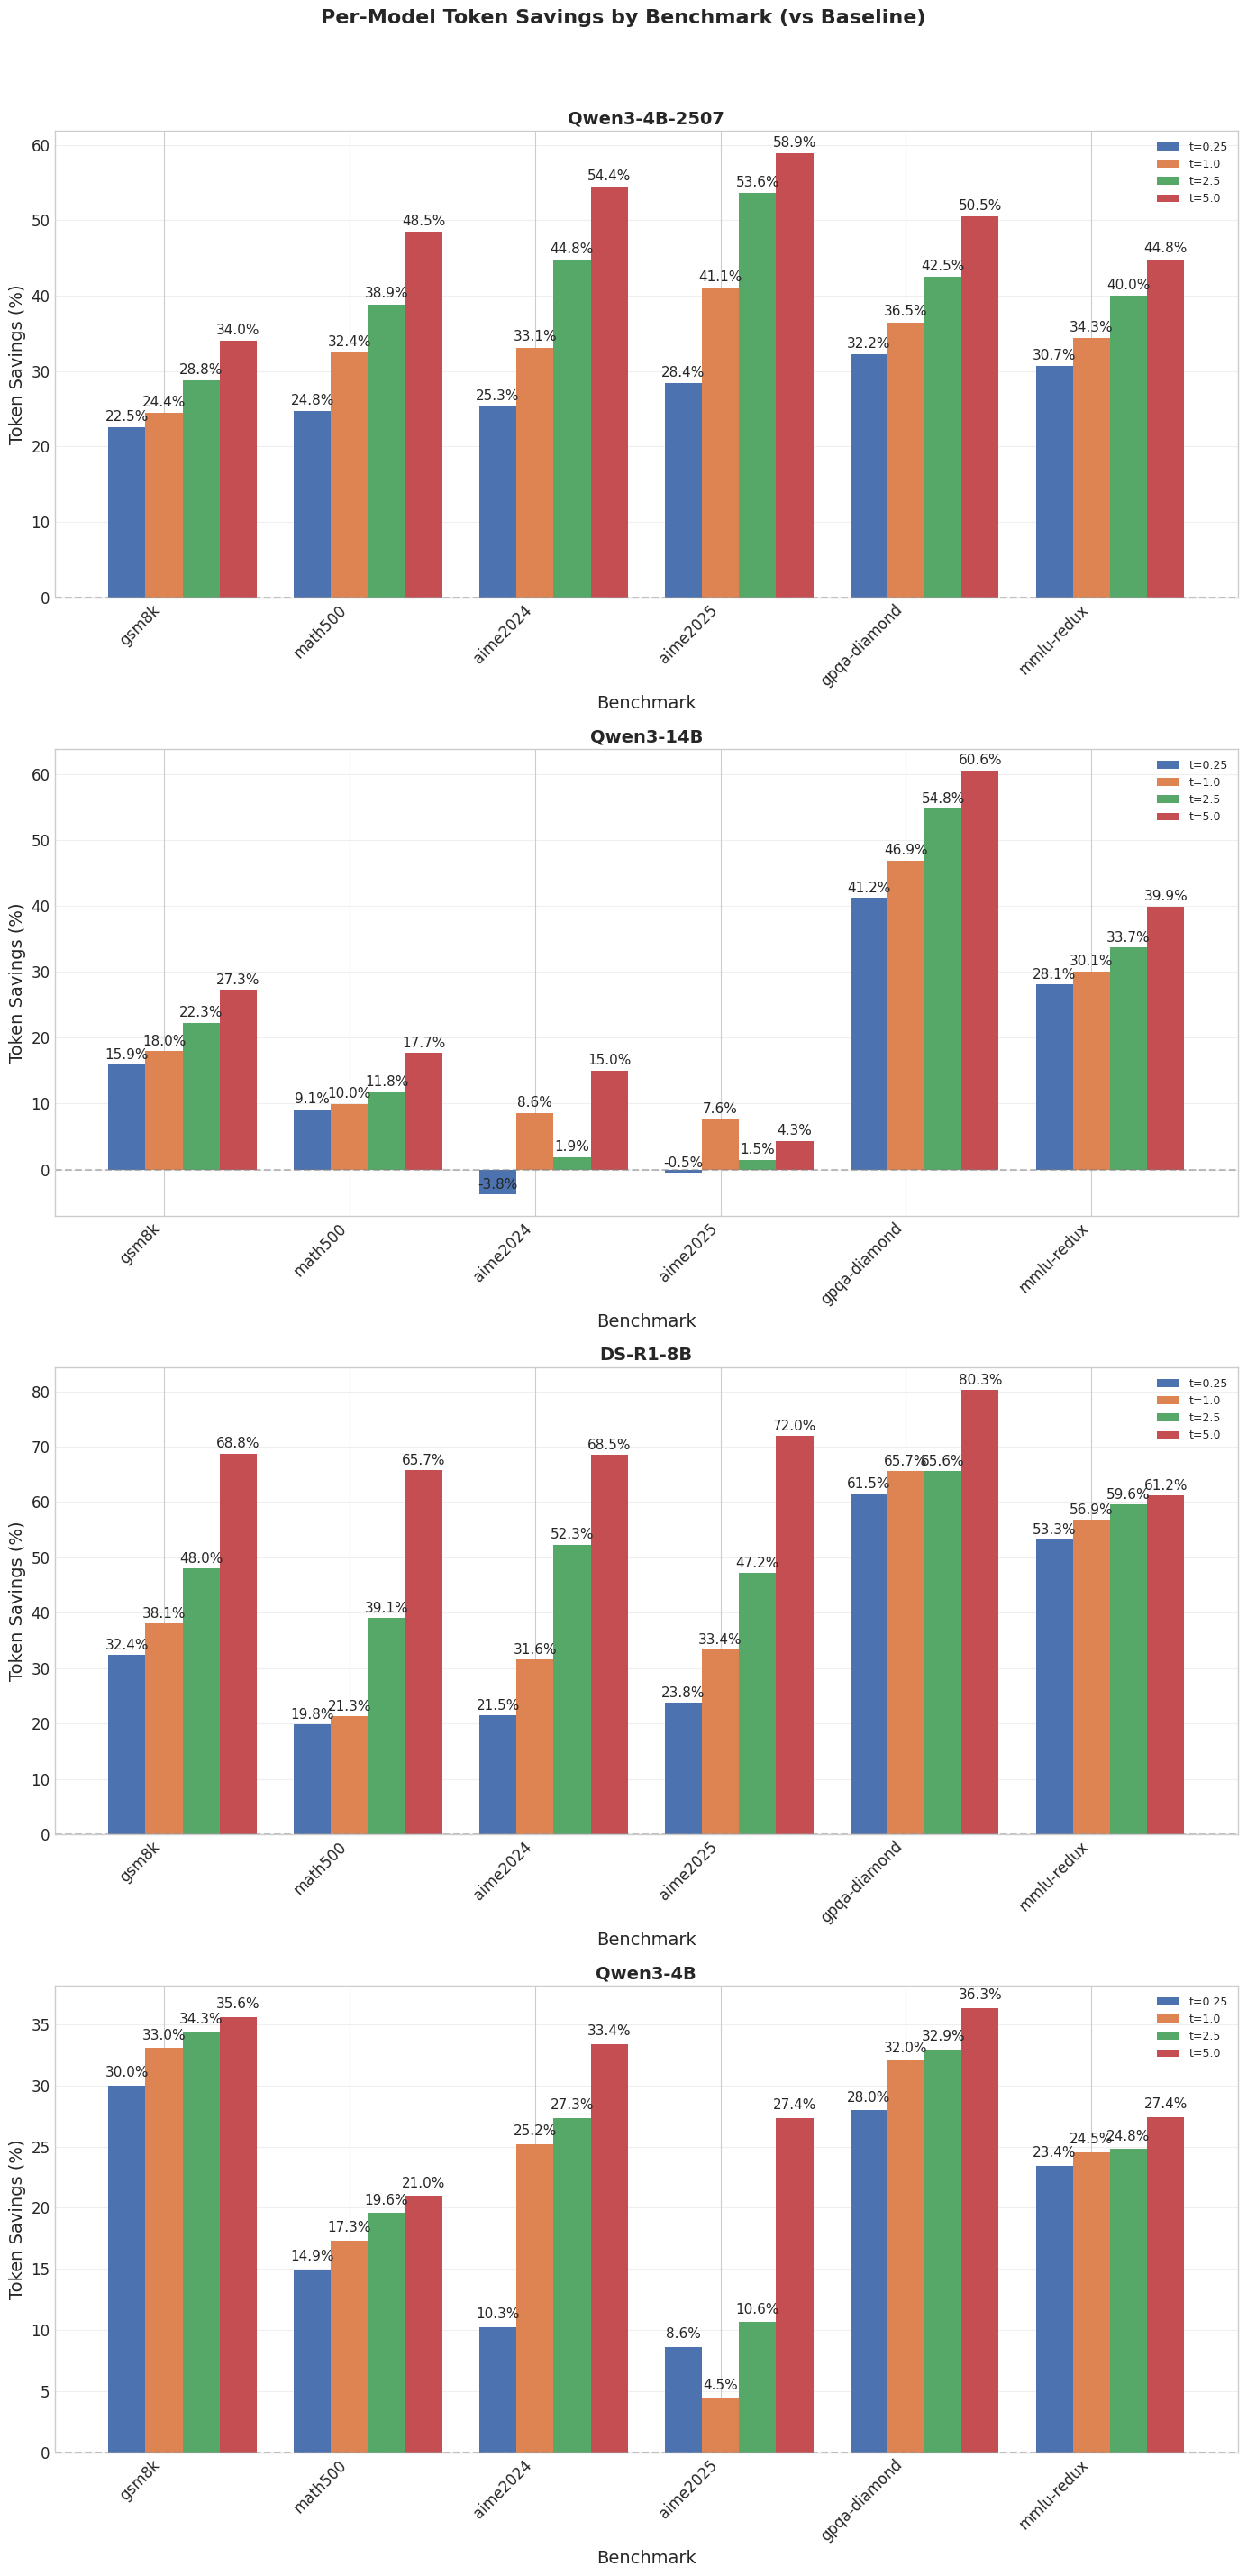

In [10]:
# Per-model token savings bar chart
num_models = len(filtered_rollout_data)
if num_models == 0:
    print("No data available for this plot.")
else:
    fig, axes = plt.subplots(num_models, 1, figsize=(14, 7 * num_models))
    if num_models == 1:
        axes = [axes]

    for model_idx, (rollout_name, rollout_model_data) in enumerate(
        filtered_rollout_data.items()
    ):
        ax = axes[model_idx]
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        # Collect data for this model
        model_benchmarks = []
        model_savings = {f"t={t}": [] for t in thresholds}

        for benchmark in benchmarks:
            try:
                if benchmark not in rollout_model_data:
                    continue

                model_benchmarks.append(benchmark)
                baseline_tokens = rollout_model_data[benchmark]["avg_token_length"]

                # ThinkBrake thresholds
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            try:
                                savings = (
                                    1
                                    - tb_data[key]["avg_token_length"] / baseline_tokens
                                ) * 100
                                model_savings[f"t={thresh}"].append(savings)
                            except Exception:
                                model_savings[f"t={thresh}"].append(0)
                        else:
                            model_savings[f"t={thresh}"].append(0)
                else:
                    for t in thresholds:
                        model_savings[f"t={t}"].append(0)
            except Exception:
                continue

        # Plot grouped bars
        if model_benchmarks:
            x = np.arange(len(model_benchmarks))
            width = 0.2

            for i, thresh in enumerate(thresholds):
                try:
                    key = f"t={thresh}"
                    if model_savings[key]:
                        bars = ax.bar(
                            x + i * width,
                            model_savings[key],
                            width,
                            label=key,
                            color=bar_threshold_colors[i % len(bar_threshold_colors)],
                        )
                        # Add value labels on bars
                        for bar, val in zip(bars, model_savings[key]):
                            ax.text(
                                bar.get_x() + bar.get_width() / 2,
                                bar.get_height() + 0.5,
                                f"{val:.1f}%",
                                ha="center",
                                va="bottom",
                                fontsize=11,
                            )
                except Exception:
                    continue

            ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5)
            ax.set_xlabel("Benchmark")
            ax.set_ylabel("Token Savings (%)")
            ax.set_title(f"{display_name}", fontsize=14, fontweight="bold")
            ax.set_xticks(x + width)
            ax.set_xticklabels(model_benchmarks, rotation=45, ha="right")
            ax.legend(loc="upper right", fontsize=9)
            ax.grid(True, alpha=0.3, axis="y")

    plt.suptitle(
        "Per-Model Token Savings by Benchmark (vs Baseline)",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()

## Per-Model Accuracy Change Bar Chart
Show accuracy change (pp) for each benchmark at different thresholds (per model)


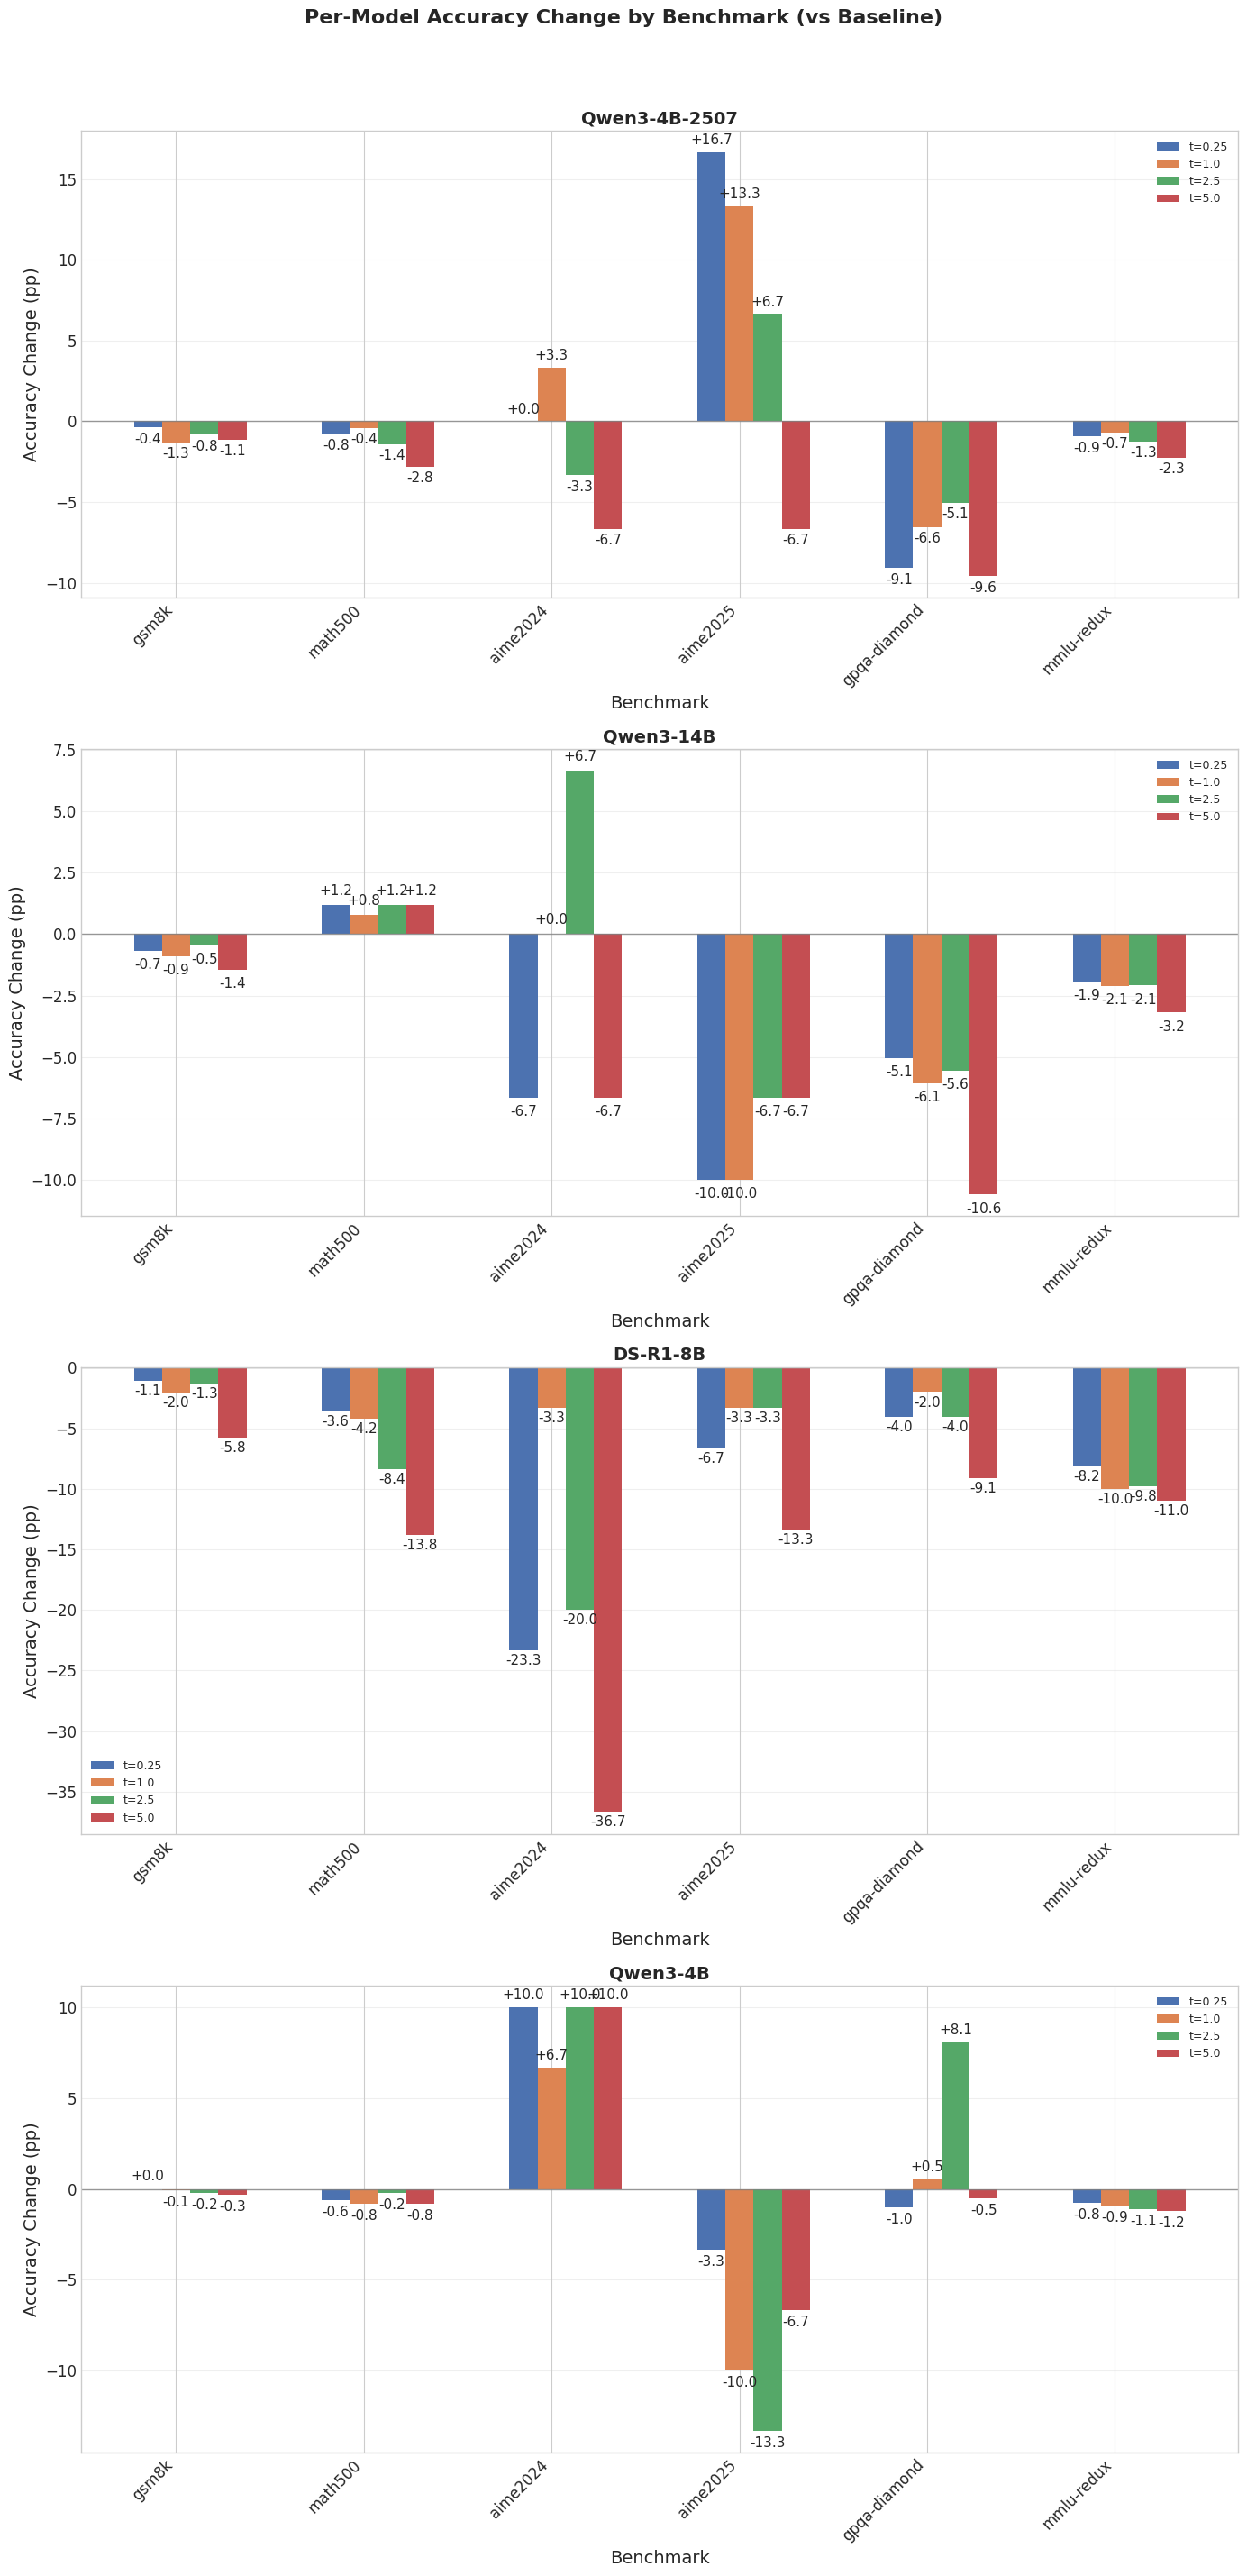

In [11]:
# Per-model accuracy change bar chart
num_models = len(filtered_rollout_data)
if num_models == 0:
    print("No data available for this plot.")
else:
    fig, axes = plt.subplots(num_models, 1, figsize=(14, 7 * num_models))
    if num_models == 1:
        axes = [axes]

    for model_idx, (rollout_name, rollout_model_data) in enumerate(
        filtered_rollout_data.items()
    ):
        ax = axes[model_idx]
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        # Collect data for this model
        model_benchmarks = []
        model_acc_change = {f"t={t}": [] for t in thresholds}

        for benchmark in benchmarks:
            try:
                if benchmark not in rollout_model_data:
                    continue

                model_benchmarks.append(benchmark)
                baseline_acc = rollout_model_data[benchmark]["accuracy"]

                # ThinkBrake thresholds
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            try:
                                acc_change = tb_data[key]["accuracy"] - baseline_acc
                                model_acc_change[f"t={thresh}"].append(acc_change)
                            except Exception:
                                model_acc_change[f"t={thresh}"].append(0)
                        else:
                            model_acc_change[f"t={thresh}"].append(0)
                else:
                    for t in thresholds:
                        model_acc_change[f"t={t}"].append(0)
            except Exception:
                continue

        # Plot grouped bars
        if model_benchmarks:
            x = np.arange(len(model_benchmarks))
            width = 0.15

            for i, thresh in enumerate(thresholds):
                try:
                    key = f"t={thresh}"
                    if model_acc_change[key]:
                        bars = ax.bar(
                            x + i * width,
                            model_acc_change[key],
                            width,
                            label=key,
                            color=bar_threshold_colors[i % len(bar_threshold_colors)],
                        )
                        # Add value labels on bars
                        for bar, val in zip(bars, model_acc_change[key]):
                            va = "bottom" if val >= 0 else "top"
                            offset = 0.3 if val >= 0 else -0.3
                            ax.text(
                                bar.get_x() + bar.get_width() / 2,
                                bar.get_height() + offset,
                                f"{val:+.1f}",
                                ha="center",
                                va=va,
                                fontsize=11,
                            )
                except Exception:
                    continue

            ax.axhline(y=0, color="gray", linestyle="-", alpha=0.8, linewidth=1)
            ax.set_xlabel("Benchmark")
            ax.set_ylabel("Accuracy Change (pp)")
            ax.set_title(f"{display_name}", fontsize=14, fontweight="bold")
            ax.set_xticks(x + width)
            ax.set_xticklabels(model_benchmarks, rotation=45, ha="right")
            ax.legend(loc="best", fontsize=9)
            ax.grid(True, alpha=0.3, axis="y")

    plt.suptitle(
        "Per-Model Accuracy Change by Benchmark (vs Baseline)",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()

## 🔬 Method Comparison: ThinkBrake vs Thinkless
Compare the performance of ThinkBrake (our method) with Thinkless (baseline without thinking)


In [12]:
# Load Thinkless data
try:
    with open("../outputs/leaderboard_thinkless.json", "r") as f:
        thinkless_data = json.load(f)

    # Filter thinkless data to include only the models we're analyzing
    filtered_thinkless_data = {}
    for model_key in INCLUDE_MODELS:
        if model_key in thinkless_data:
            filtered_thinkless_data[model_key] = thinkless_data[model_key]
        # Also check with mapped name
        mapped_name = model_name_map.get(model_key, model_key)
        if mapped_name in thinkless_data:
            filtered_thinkless_data[model_key] = thinkless_data[mapped_name]

    print("✅ Thinkless data loaded successfully!")
    print(f"Models with thinkless data: {list(filtered_thinkless_data.keys())}")
except FileNotFoundError:
    print(
        "⚠️ Thinkless leaderboard file not found. Please run generate_thinkless.py first."
    )
    filtered_thinkless_data = {}

✅ Thinkless data loaded successfully!
Models with thinkless data: ['Qwen_Qwen3-4B-Thinking-2507', 'Qwen_Qwen3-14B', 'deepseek-ai_DeepSeek-R1-Distill-Llama-8B']


### Accuracy Comparison: Baseline vs Thinkless vs ThinkBrake
Compare accuracy across all three methods for each model and benchmark


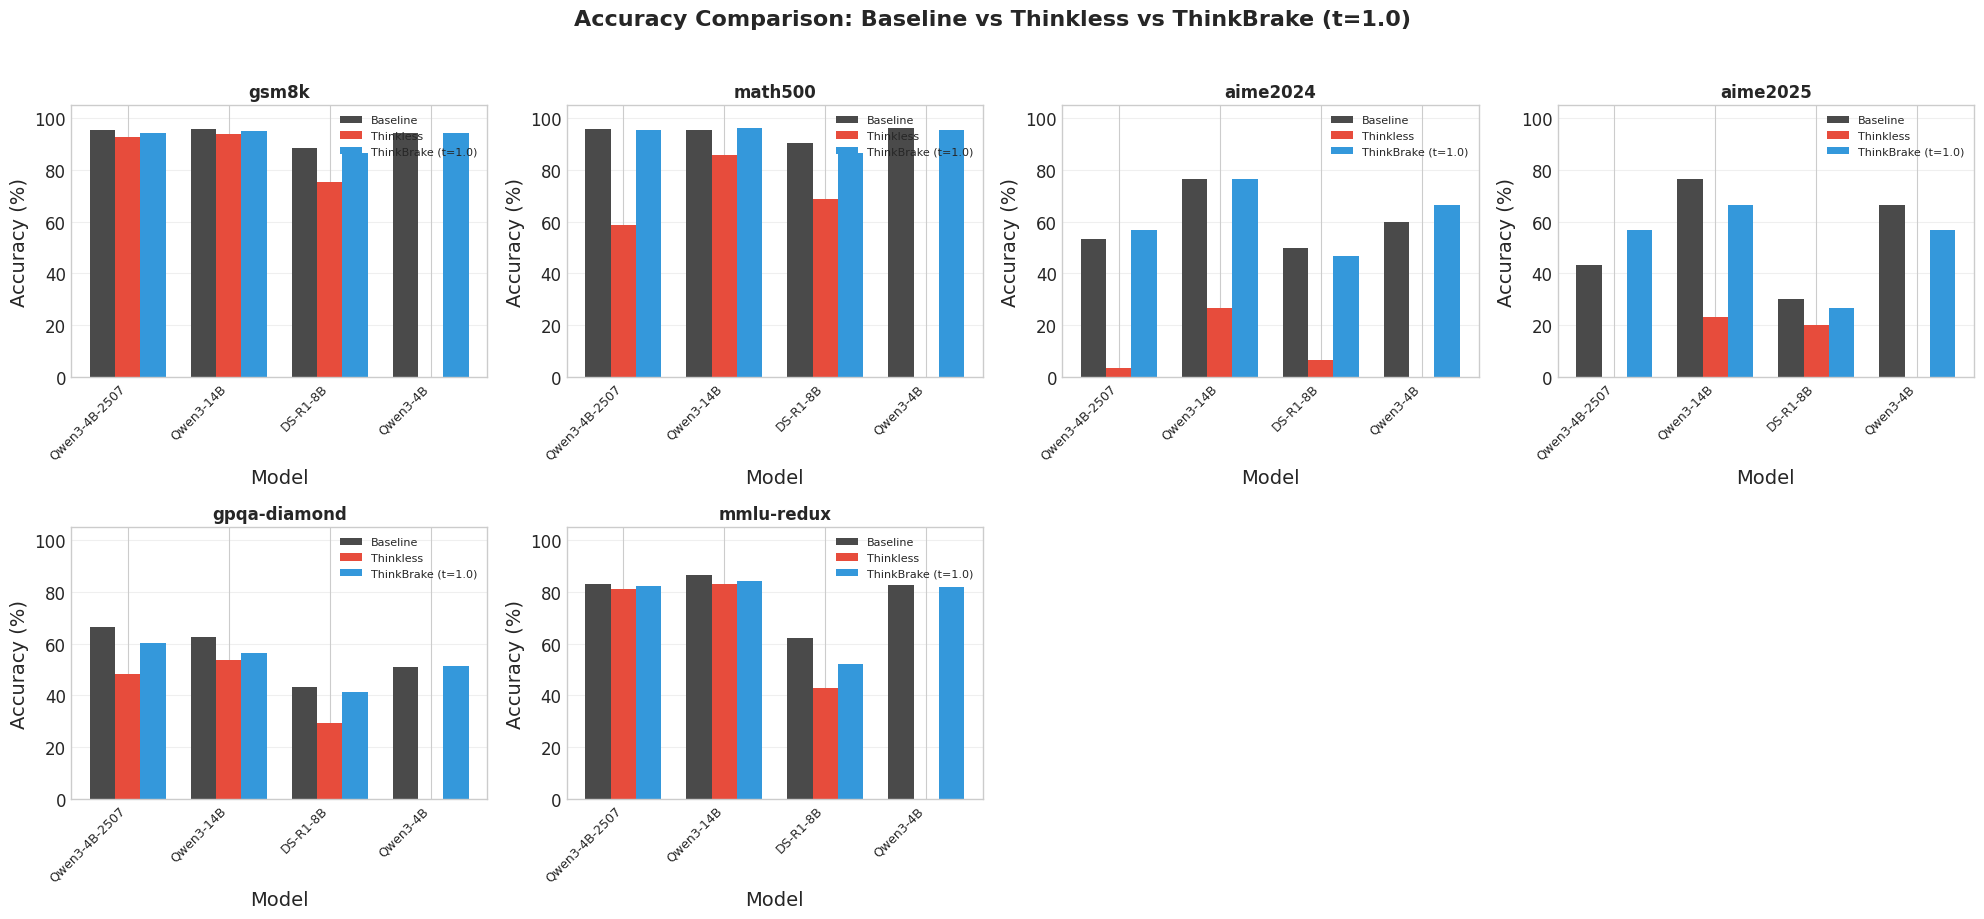

In [13]:
# Method comparison: Accuracy by Benchmark (grouped bar chart)
if filtered_thinkless_data:
    # Select best ThinkBrake threshold for comparison (using t=1.0 as default)
    best_threshold = "1.0"

    # 동적 레이아웃으로 subplot 생성
    n_benchmarks = len(benchmarks)
    fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=4)

    method_colors = {
        "Baseline": "#4a4a4a",
        "Thinkless": "#e74c3c",
        "ThinkBrake": "#3498db",
    }

    for idx, benchmark in enumerate(benchmarks):
        ax = axes[idx]

        models_list = []
        baseline_accs = []
        thinkless_accs = []
        thinkbrake_accs = []

        for rollout_name in filtered_rollout_data:
            mapped_name = model_name_map.get(rollout_name, rollout_name)
            display_name = short_names.get(mapped_name, rollout_name)

            try:
                # Baseline accuracy
                if benchmark in filtered_rollout_data[rollout_name]:
                    baseline_acc = filtered_rollout_data[rollout_name][benchmark][
                        "accuracy"
                    ]
                else:
                    continue

                # Thinkless accuracy
                thinkless_acc = None
                if (
                    rollout_name in filtered_thinkless_data
                    and benchmark in filtered_thinkless_data[rollout_name]
                ):
                    thinkless_acc = filtered_thinkless_data[rollout_name][benchmark][
                        "accuracy"
                    ]

                # ThinkBrake accuracy (best threshold)
                thinkbrake_acc = None
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    key = f"threshold_{best_threshold}"
                    if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                        thinkbrake_acc = filtered_thinkbrake_data[mapped_name][
                            benchmark
                        ][key]["accuracy"]

                models_list.append(display_name)
                baseline_accs.append(baseline_acc)
                thinkless_accs.append(thinkless_acc if thinkless_acc else 0)
                thinkbrake_accs.append(thinkbrake_acc if thinkbrake_acc else 0)
            except Exception:
                continue

        if models_list:
            x = np.arange(len(models_list))
            width = 0.25

            ax.bar(
                x - width,
                baseline_accs,
                width,
                label="Baseline",
                color=method_colors["Baseline"],
            )
            ax.bar(
                x,
                thinkless_accs,
                width,
                label="Thinkless",
                color=method_colors["Thinkless"],
            )
            ax.bar(
                x + width,
                thinkbrake_accs,
                width,
                label=f"ThinkBrake (t={best_threshold})",
                color=method_colors["ThinkBrake"],
            )

            ax.set_xlabel("Model")
            ax.set_ylabel("Accuracy (%)")
            ax.set_title(f"{benchmark}", fontsize=12, fontweight="bold")
            ax.set_xticks(x)
            ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=9)
            ax.legend(loc="best", fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")
            ax.set_ylim(0, 105)

    plt.suptitle(
        f"Accuracy Comparison: Baseline vs Thinkless vs ThinkBrake (t={best_threshold})",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Thinkless data not available for comparison.")

### Token Efficiency Comparison: Thinkless vs ThinkBrake
Compare token savings of both methods relative to baseline


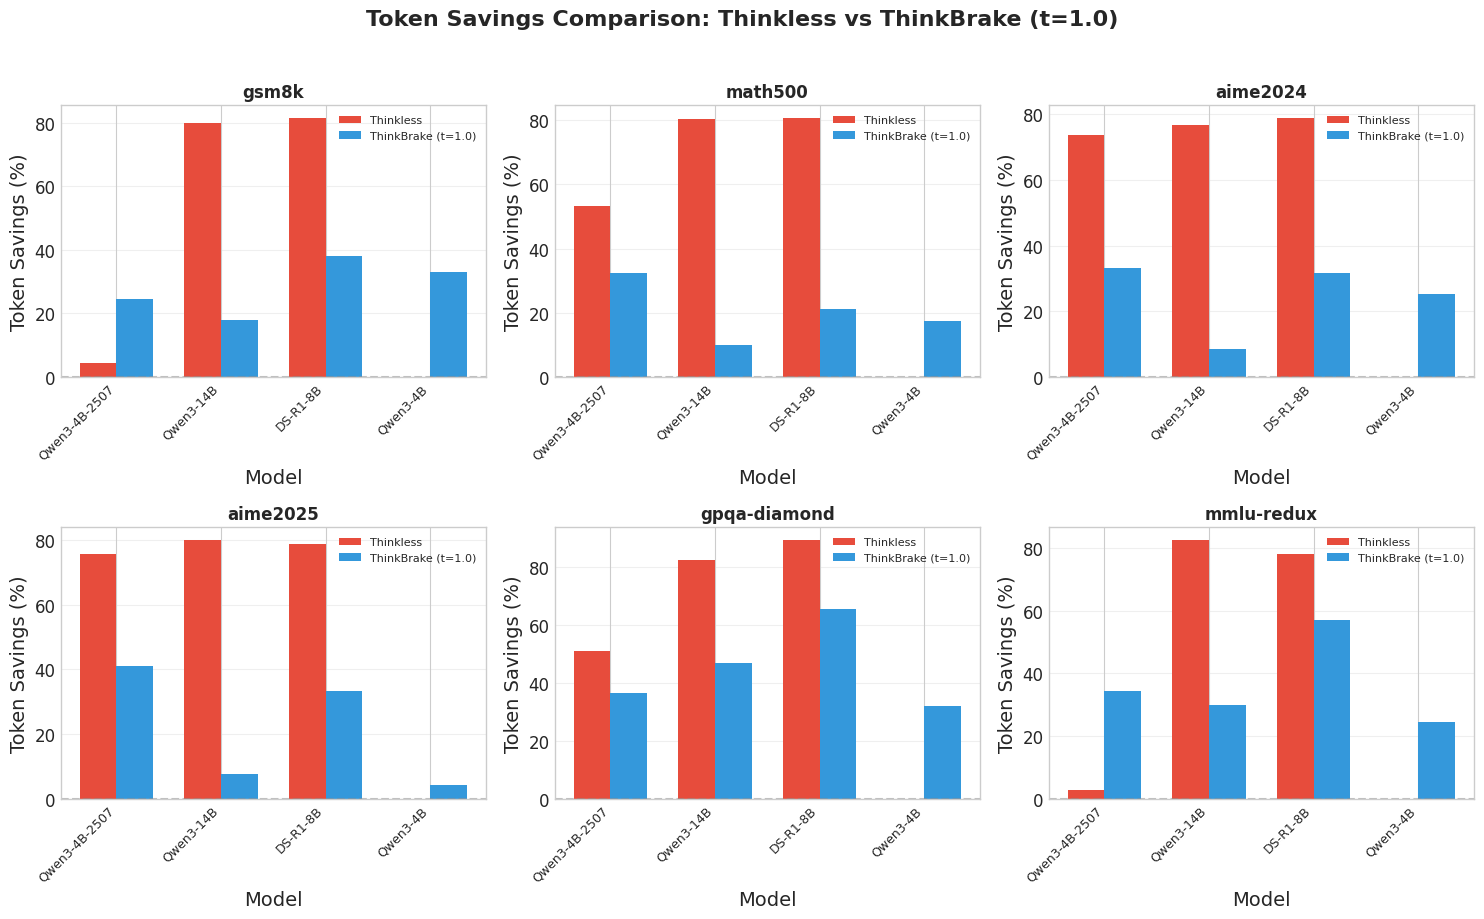

In [14]:
# Token savings comparison: Thinkless vs ThinkBrake
if filtered_thinkless_data:
    best_threshold = "1.0"

    # 동적 레이아웃으로 subplot 생성
    n_benchmarks = len(benchmarks)
    fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=3)

    method_colors = {"Thinkless": "#e74c3c", "ThinkBrake": "#3498db"}

    for idx, benchmark in enumerate(benchmarks):
        ax = axes[idx]

        models_list = []
        thinkless_savings = []
        thinkbrake_savings = []

        for rollout_name in filtered_rollout_data:
            mapped_name = model_name_map.get(rollout_name, rollout_name)
            display_name = short_names.get(mapped_name, rollout_name)

            try:
                # Baseline token length
                if benchmark in filtered_rollout_data[rollout_name]:
                    baseline_tokens = filtered_rollout_data[rollout_name][benchmark][
                        "avg_token_length"
                    ]
                else:
                    continue

                # Thinkless token savings
                thinkless_saving = None
                if (
                    rollout_name in filtered_thinkless_data
                    and benchmark in filtered_thinkless_data[rollout_name]
                ):
                    thinkless_tokens = filtered_thinkless_data[rollout_name][benchmark][
                        "avg_token_length"
                    ]
                    thinkless_saving = (1 - thinkless_tokens / baseline_tokens) * 100

                # ThinkBrake token savings
                thinkbrake_saving = None
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    key = f"threshold_{best_threshold}"
                    if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                        thinkbrake_tokens = filtered_thinkbrake_data[mapped_name][
                            benchmark
                        ][key]["avg_token_length"]
                        thinkbrake_saving = (
                            1 - thinkbrake_tokens / baseline_tokens
                        ) * 100

                models_list.append(display_name)
                thinkless_savings.append(thinkless_saving if thinkless_saving else 0)
                thinkbrake_savings.append(thinkbrake_saving if thinkbrake_saving else 0)
            except Exception:
                continue

        if models_list:
            x = np.arange(len(models_list))
            width = 0.35

            ax.bar(
                x - width / 2,
                thinkless_savings,
                width,
                label="Thinkless",
                color=method_colors["Thinkless"],
            )
            ax.bar(
                x + width / 2,
                thinkbrake_savings,
                width,
                label=f"ThinkBrake (t={best_threshold})",
                color=method_colors["ThinkBrake"],
            )

            ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5)
            ax.set_xlabel("Model")
            ax.set_ylabel("Token Savings (%)")
            ax.set_title(f"{benchmark}", fontsize=12, fontweight="bold")
            ax.set_xticks(x)
            ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=9)
            ax.legend(loc="best", fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")

    plt.suptitle(
        f"Token Savings Comparison: Thinkless vs ThinkBrake (t={best_threshold})",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Thinkless data not available for comparison.")

### Method Comparison Summary: Separated Metrics
**Performance (Accuracy)** and **Token Savings** shown in separate visualizations for clearer comparison


### Per-Benchmark Detailed Comparison
Accuracy and Token Savings broken down by each benchmark separately


In [15]:
# Per-benchmark detailed comparison tables
if filtered_thinkless_data:
    best_threshold = "1.0"

    # Collect detailed per-benchmark data
    perf_data = []
    savings_data = []

    for rollout_name, rollout_model_data in filtered_rollout_data.items():
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        for benchmark in benchmarks:
            try:
                if benchmark not in rollout_model_data:
                    continue

                baseline_acc = rollout_model_data[benchmark]["accuracy"]
                baseline_tokens = rollout_model_data[benchmark]["avg_token_length"]

                # Thinkless
                thinkless_acc = None
                thinkless_saving = None
                if (
                    rollout_name in filtered_thinkless_data
                    and benchmark in filtered_thinkless_data[rollout_name]
                ):
                    thinkless_acc = filtered_thinkless_data[rollout_name][benchmark][
                        "accuracy"
                    ]
                    tl_tokens = filtered_thinkless_data[rollout_name][benchmark][
                        "avg_token_length"
                    ]
                    thinkless_saving = (1 - tl_tokens / baseline_tokens) * 100

                # ThinkBrake
                thinkbrake_acc = None
                thinkbrake_saving = None
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    key = f"threshold_{best_threshold}"
                    if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                        thinkbrake_acc = filtered_thinkbrake_data[mapped_name][
                            benchmark
                        ][key]["accuracy"]
                        tb_tokens = filtered_thinkbrake_data[mapped_name][benchmark][
                            key
                        ]["avg_token_length"]
                        thinkbrake_saving = (1 - tb_tokens / baseline_tokens) * 100

                perf_data.append(
                    {
                        "Model": display_name,
                        "Benchmark": benchmark,
                        "Baseline": baseline_acc,
                        "Thinkless": thinkless_acc,
                        f"ThinkBrake": thinkbrake_acc,
                    }
                )

                savings_data.append(
                    {
                        "Model": display_name,
                        "Benchmark": benchmark,
                        "Thinkless": thinkless_saving,
                        f"ThinkBrake": thinkbrake_saving,
                    }
                )
            except Exception:
                continue

    # Display Performance Table
    print("=" * 100)
    print("🎯 PERFORMANCE (ACCURACY %) - Per Benchmark")
    print("=" * 100)
    perf_df = pd.DataFrame(perf_data)
    perf_pivot = perf_df.pivot_table(
        index="Benchmark",
        columns="Model",
        values=["Baseline", "Thinkless", "ThinkBrake"],
        aggfunc="first",
    ).round(2)
    display(perf_pivot)

    # Display Token Savings Table
    print("\n" + "=" * 100)
    print("💾 TOKEN SAVINGS (%) - Per Benchmark")
    print("=" * 100)
    savings_df = pd.DataFrame(savings_data)
    savings_pivot = savings_df.pivot_table(
        index="Benchmark",
        columns="Model",
        values=["Thinkless", "ThinkBrake"],
        aggfunc="first",
    ).round(2)
    display(savings_pivot)

else:
    print("⚠️ Thinkless data not available for comparison.")

🎯 PERFORMANCE (ACCURACY %) - Per Benchmark


Baseline                                  ThinkBrake            \
Model        DS-R1-8B Qwen3-14B Qwen3-4B Qwen3-4B-2507   DS-R1-8B Qwen3-14B   
Benchmark                                                                     
aime2024        50.00     76.67    60.00         53.33      46.67     76.67   
aime2025        30.00     76.67    66.67         43.33      26.67     66.67   
gpqa-diamond    43.43     62.63    51.01         66.67      41.41     56.57   
gsm8k           88.55     95.98    94.39         95.45      86.50     95.07   
math500         90.60     95.60    96.20         96.00      86.40     96.40   
mmlu-redux      62.37     86.47    82.81         83.16      52.33     84.37   

                                    Thinkless                          
Model        Qwen3-4B Qwen3-4B-2507  DS-R1-8B Qwen3-14B Qwen3-4B-2507  
Benchmark                                                              
aime2024        66.67         56.67      6.67     26.67          3.33  
aime2025        56.67         56.67     20.00     23.33          0.00  
gpqa-diamond    51.52         60.10     29.29     53.54         48.48  
gsm8k           94.31         94.16     75.28     94.09         92.87  
math500         95.40         95.60     68.80     85.80         58.80  
mmlu-redux      81.88         82.46     43.00     83.12         81.30


💾 TOKEN SAVINGS (%) - Per Benchmark


ThinkBrake                                  Thinkless            \
Model          DS-R1-8B Qwen3-14B Qwen3-4B Qwen3-4B-2507  DS-R1-8B Qwen3-14B   
Benchmark                                                                      
aime2024          31.60      8.62    25.20         33.13     78.82     76.83   
aime2025          33.39      7.64     4.46         41.05     78.78     79.91   
gpqa-diamond      65.66     46.92    32.02         36.47     89.31     82.43   
gsm8k             38.12     17.95    33.04         24.42     81.49     80.00   
math500           21.33      9.98    17.31         32.43     80.64     80.48   
mmlu-redux        56.87     30.05    24.52         34.35     78.12     82.43   

                            
Model        Qwen3-4B-2507  
Benchmark                   
aime2024             73.79  
aime2025             75.58  
gpqa-diamond         50.98  
gsm8k                 4.54  
math500              53.21  
mmlu-redux            2.82